# Regression, Gradient Descent

Calculate a new number of x, which will minimize the loss function.

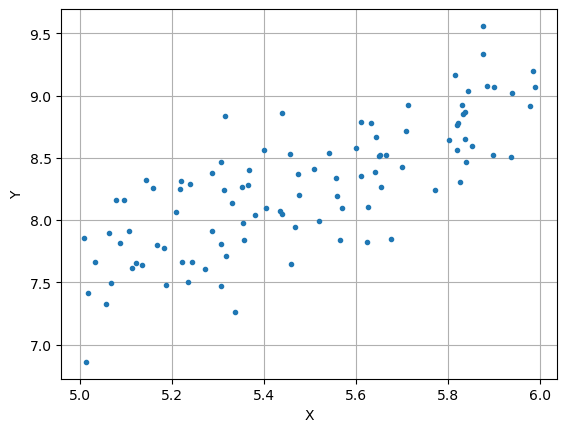

In [63]:
# create dataset
import numpy as np

# create a random simulating dataset
X = 5 + np.random.rand(100, 1)*1
# create a random number
Y = 1.477*X + 0.089 + np.random.randn(*X.shape)*0.33

# plot
import pylab
pylab.plot(X, Y, '.')
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.grid()

Next we will define a loss function of it.

/tmp/ipykernel_30809/3294342345.py:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


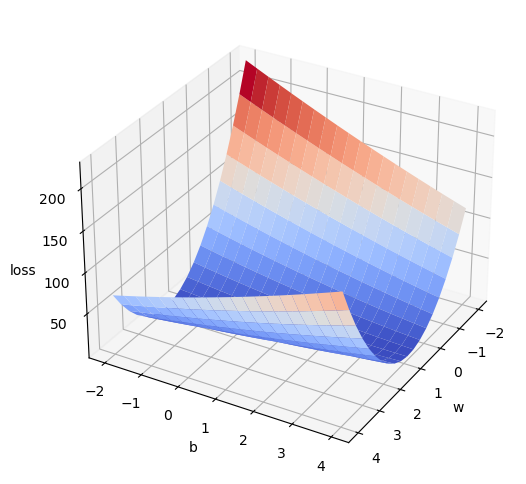

In [64]:
def calc_loss(w, b):
    N = X.shape[0]
    loss = 0.5/N * np.linalg.norm(Y - w*X - b, 2)**2
    return loss

# create a grid
ws = np.linspace(-2, 4, 20)
bs = np.linspace(-2, 4, 20)
W, B = np.meshgrid(ws, bs)
# calc loss
losses = np.array([calc_loss(w, b) for w, b in zip(np.ravel(W), np.ravel(B))])
# reshape
Z = losses.reshape(W.shape)

# plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
ax.plot_surface(W, B, Z, rstride=1, cstride=1, alpha=1, cmap=plt.cm.coolwarm, linewidth=0.1)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')
ax.view_init(30, 30)


+ linear regression
+ logistic regression
+ Classification

logistic regression can compress the input to 0~1

by running the gradient runner funciton, we can get the best value of x.
each time this funciton is executed, w and b will take one step towards the less loss value.

In [65]:
# define the gradient descent function
def calc_gradient(b_current, w_current, points, learning_rate):
    b_gradient = 0
    w_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((w_current * x) + b_current))
        w_gradient += -(2/N) * x * (y - ((w_current * x) + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_w = w_current - (learning_rate * w_gradient)
    return [new_b, new_w]

# gradient descent 
def gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations):
    b = starting_b
    w = starting_w
    for i in range(num_iterations):
        b, w = calc_gradient(b, w, np.array(points), learning_rate)
    return b, w

In [66]:
# run gradient descent
points = np.column_stack((X, Y))
learning_rate = 0.0001
b = np.random.randn(1)
w = np.random.randn(1)
num_iterations = 1000


b:[0.22640059], w:[1.46569419]


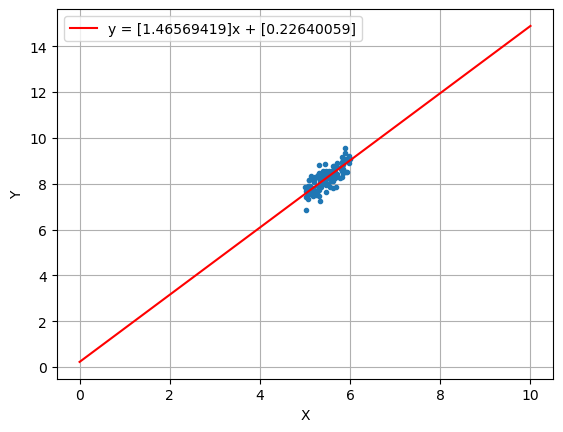

In [68]:
b, w = gradient_descent_runner(points, b, w, learning_rate, num_iterations)
print("b:{0}, w:{1}".format(b, w))

# plot
pylab.plot(X, Y, '.')
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.grid()
x = np.linspace(0, 10, 100)
y = w*x + b
pylab.plot(x, y, '-r', label= 'y = {0}x + {1}'.format(w, b))
# Y = 1.477*X + 0.089 + np.random.randn(*X.shape)*0.33
pylab.legend(loc='upper left')
pylab.show()